# Projet

Dataset sur plus de 6000 recettes de plats indiens

## problématique

problématique temporaire : quels sont les ingrédients les plus utilisés en fonction des types de cuisines (régions) ?<br>
ou à quels types de repas on prend le plus de temps de préparation<br>
ou quels sont les types de dietes les plus contraignants sur les ingrédients

## imports

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import graphviz

In [333]:
recipes = pd.read_csv("recipes/IndianFoodDatasetCSV.csv",index_col=0)

In [334]:
recipes.head()

,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
Srno,,,,,,,,,,,,,,
1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


## Partie 1 Analyse graphique des données

### datacleaning

il faut clean le dataset et séparer tout les ingrédients de la liste (la quantité importe peu)<br>
(on peut mettre de coté les colonnes ingredients et recipename qui contiennent de l'indien et font doublon avec les colonnes traduites)<br>
(pareil pour url et instructions)

In [335]:
recipes.dtypes

RecipeName                object
TranslatedRecipeName      object
Ingredients               object
TranslatedIngredients     object
PrepTimeInMins             int64
CookTimeInMins             int64
TotalTimeInMins            int64
Servings                   int64
Cuisine                   object
Course                    object
Diet                      object
Instructions              object
TranslatedInstructions    object
URL                       object
dtype: object

on regarde si y a des lignes vides (pour les jeter, si y en a peu vu que ça changera peu au resultat final et fait gagner du temps)

In [336]:
recipes.isna().sum()

RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64

on retire les colonnes qui font doublons ou considérées inutiles

In [337]:
clean = recipes.drop(labels=["RecipeName","Ingredients","Instructions","URL"],axis=1)

In [338]:
clean = clean.dropna(how='any',subset=['TranslatedIngredients'])

on renomme les colonnes pour plus de lisibilité

In [339]:
clean = clean.rename(columns = {'TranslatedRecipeName':'Recipes','TranslatedIngredients':'Ingredients','TranslatedInstructions':'Instructions'}) 

on va faire passer les minutes qui sont en entier en datetime pour respecter la consigne

In [360]:
clean['TotalTimeInMins'] = pd.to_datetime(clean['TotalTimeInMins'], unit='m').dt.minute
clean['CookTimeInMins'] = pd.to_datetime(clean['CookTimeInMins'], unit='m').dt.minute
clean['PrepTimeInMins'] = pd.to_datetime(clean['PrepTimeInMins'], unit='m').dt.minute

pour recuperer les minutes on peut faire :

In [341]:
pd.to_datetime(clean['TotalTimeInMins'], unit='m').dt.minute

Srno
1        45
2        15
3        50
4        45
5        30
         ..
14073     0
14107    30
14165    15
14167    15
14211    40
Name: TotalTimeInMins, Length: 6865, dtype: int64

In [342]:
clean['Ingredients'][1]

'6 Karela (Bitter Gourd/ Pavakkai) - deseeded,Salt - to taste,1 Onion - thinly sliced,3 tablespoon Gram flour (besan),2 teaspoons Turmeric powder (Haldi),1 tablespoon Red Chilli powder,2 teaspoons Cumin seeds (Jeera),1 tablespoon Coriander Powder (Dhania),1 tablespoon Amchur (Dry Mango Powder),Sunflower Oil - as required'

In [343]:
clean['nbrOfIngr'] = clean['Servings']
for val in clean.index:
    clean['nbrOfIngr'][val] = clean['Ingredients'][val].count(',')+1

<ipython-input-343-acfd74e62fab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['nbrOfIngr'][val] = clean['Ingredients'][val].count(',')+1


In [344]:
clean.head()

,Recipes,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,nbrOfIngr
Srno,,,,,,,,,,,
1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",1970-01-01 00:15:00,1970-01-01 00:30:00,1970-01-01 00:45:00,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",10
2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",1970-01-01 00:05:00,1970-01-01 00:10:00,1970-01-01 00:15:00,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",12
3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",1970-01-01 00:20:00,1970-01-01 00:30:00,1970-01-01 00:50:00,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",12
4,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",1970-01-01 00:15:00,1970-01-01 00:30:00,1970-01-01 00:45:00,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,18
5,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",1970-01-01 00:10:00,1970-01-01 00:20:00,1970-01-01 00:30:00,4,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...",12


### regroupage des données

on va regrouper les valeurs trop uniques dans Cuisine, Course et Diet

In [345]:
clean['Cuisine'].value_counts()

Indian                  1157
Continental             1020
North Indian Recipes     936
South Indian Recipes     681
Italian Recipes          235
                        ... 
Burmese                    1
Jewish                     1
Shandong                   1
Side Dish                  1
Brunch                     1
Name: Cuisine, Length: 82, dtype: int64

In [346]:
for val in clean.index:
    if clean['Cuisine'][val] != '<20 Other' or clean['Cuisine'][val] != '<50 Other':
        if clean['Cuisine'].value_counts()[clean['Cuisine'][val]] < 20:
            clean['Cuisine'][val] = '<20 Other'
        elif clean['Cuisine'].value_counts()[clean['Cuisine'][val]] < 50:
            clean['Cuisine'][val] = '<50 Other'

<ipython-input-346-85cc2d79788d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Cuisine'][val] = '<20 Other'
<ipython-input-346-85cc2d79788d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Cuisine'][val] = '<50 Other'


In [347]:
clean['Cuisine'].value_counts()

Indian                   1157
Continental              1020
North Indian Recipes      936
South Indian Recipes      681
<20 Other                 583
Italian Recipes           235
<50 Other                 207
Bengali Recipes           175
Maharashtrian Recipes     173
Kerala Recipes            163
Tamil Nadu                156
Karnataka                 149
Fusion                    135
Rajasthani                123
Mexican                   119
Andhra                    118
Gujarati Recipes﻿         115
Goan Recipes               99
Punjabi                    84
Chettinad                  74
Asian                      72
Thai                       66
Kashmiri                   59
Chinese                    59
French                     54
Middle Eastern             53
Name: Cuisine, dtype: int64

In [348]:
clean['Course'].value_counts()

Lunch                           1763
Side Dish                        992
Snack                            876
Dinner                           781
Dessert                          659
Appetizer                        637
Main Course                      315
World Breakfast                  260
South Indian Breakfast           260
North Indian Breakfast           122
Indian Breakfast                 101
Vegetarian                        47
One Pot Dish                      33
High Protein Vegetarian            7
Brunch                             4
Vegan                              3
Non Vegeterian                     2
No Onion No Garlic (Sattvic)       1
Sugar Free Diet                    1
Eggetarian                         1
Name: Course, dtype: int64

In [349]:
for val in clean.index:
    if clean['Course'][val] != 'Other':
        if clean['Course'].value_counts()[clean['Course'][val]] < 50:
            clean['Course'][val] = 'Other'

<ipython-input-349-864f2997a2d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Course'][val] = 'Other'


In [350]:
clean['Course'].value_counts()

Lunch                     1763
Side Dish                  992
Snack                      876
Dinner                     781
Dessert                    659
Appetizer                  637
Main Course                315
World Breakfast            260
South Indian Breakfast     260
North Indian Breakfast     122
Indian Breakfast           101
Other                       99
Name: Course, dtype: int64

In [351]:
clean['Diet'].value_counts()

Vegetarian                      4706
High Protein Vegetarian          705
Non Vegeterian                   427
Eggetarian                       344
Diabetic Friendly                260
High Protein Non Vegetarian      225
No Onion No Garlic (Sattvic)      73
Vegan                             61
Gluten Free                       50
Sugar Free Diet                   14
Name: Diet, dtype: int64

In [352]:
for val in clean.index:
    if clean['Diet'][val] != 'Other':
        if clean['Diet'].value_counts()[clean['Diet'][val]] < 75:
            clean['Diet'][val] = 'Other'

<ipython-input-352-e5bc430d09da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['Diet'][val] = 'Other'


In [353]:
clean['Diet'].value_counts()

Vegetarian                     4706
High Protein Vegetarian         705
Non Vegeterian                  427
Eggetarian                      344
Diabetic Friendly               260
High Protein Non Vegetarian     225
Other                           198
Name: Diet, dtype: int64

je viens de constater que y a des valeurs abérantes dans les portions (servings) par exemple 1000
et qui ont des zeros en temps, il s'agit probablement de mauvais copier coller qu'on pourrait corriger mais dans notre situation ça creer du bruit qu'on peut gerer plus tard

In [391]:
clean['Servings'].value_counts()

4       4541
2        972
3        417
6        340
5        156
8        110
10        88
1         85
12        42
15        27
20        21
100        9
200        7
500        5
9          5
40         5
16         4
300        4
30         4
25         3
14         3
7          3
700        2
400        2
18         2
24         1
35         1
80         1
240        1
600        1
150        1
250        1
1000       1
Name: Servings, dtype: int64

In [389]:
clean.sort_values('Servings',ascending=False).head()

,Recipes,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,nbrOfIngr
Srno,,,,,,,,,,,
1418,High Protein Soya Idli & Dosa Batter Recipe,1 cup Soybeans (Whole Soya dal) - soaked overn...,0,0,0,1000,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,To begin making the High Protein Soya Idli & D...,6
7167,Moong Dal Idli & Dosa Batter Recipe,1 cup Yellow Moong Dal (Split) - soaked overni...,0,0,0,700,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,To begin making the Moong Dal Idli and Dosa Re...,4
6372,Moong Dal Idli & Dosa Batter Recipe,"1 कप पिली मूंग दाल - रात भर भिगो ले,1 छोटा चम्...",0,0,0,700,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To make Moong Dal Idli Dosa Batter recipe, we ...",4
10895,Homemade Pizza Sauce Recipe,"1 kg Tomatoes,80 grams Onions,60 grams Carrots...",20,40,0,600,Italian Recipes,Dinner,Vegetarian,"To begin with Homemade Pizza Sauce, heat olive...",12
5479,Rajasthani Gunday Pickle Recipe (Bird Lime Pic...,"500 grams Gunde (bird lime),1 teaspoon Asafoet...",20,25,45,500,Rajasthani,Appetizer,Vegetarian,"To Prepare Rajasthani Gunde Ka Achaar, boil th...",9


In [392]:
clean['TotalTimeInMins'].value_counts()

40    1090
30    1004
50     720
35     596
45     568
25     503
0      476
20     459
55     404
15     397
10     338
5      201
12      13
7        9
18       9
22       8
51       7
17       6
11       6
13       4
54       4
48       4
29       4
42       3
27       3
46       3
28       2
24       2
16       2
4        2
2        2
3        2
9        1
37       1
52       1
53       1
44       1
34       1
32       1
38       1
58       1
19       1
31       1
8        1
47       1
59       1
Name: TotalTimeInMins, dtype: int64

In [374]:
clean.dtypes

Recipes            object
Ingredients        object
PrepTimeInMins      int64
CookTimeInMins      int64
TotalTimeInMins     int64
Servings            int64
Cuisine            object
Course             object
Diet               object
Instructions       object
nbrOfIngr           int64
dtype: object

### boites a moustaches

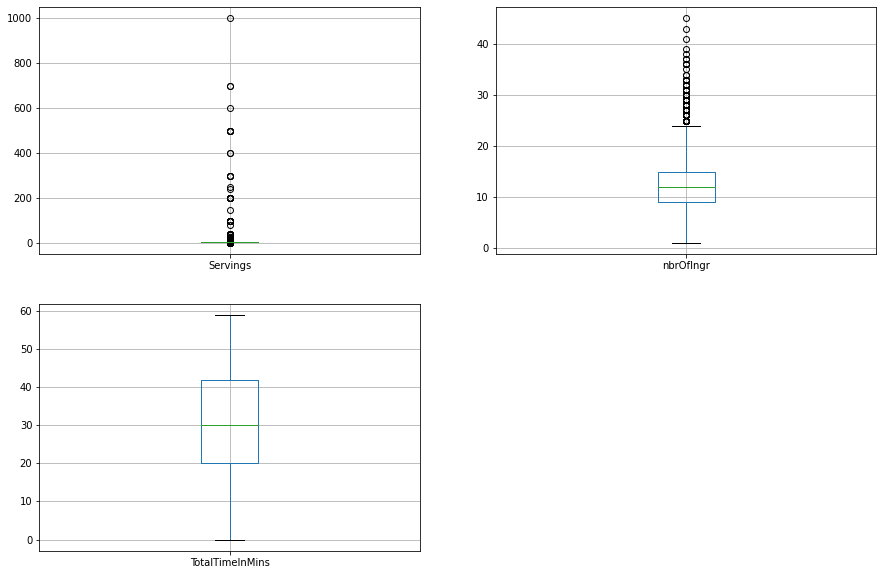

In [410]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['Servings','nbrOfIngr','TotalTimeInMins'], start=1):
    plt.subplot(2,2,i)
    clean.boxplot(col)

x[0] c'est la position de la colonne d'ou on part
samples c'est le nombre de points pris en compte (et sera coupé en 2 a chaque choix)
mse c'est min square error c'est mettre la droite entre tout les points pour avoir une difference entre en haut et en bas qui s'annule et mse c'est cette somme de distance
au niveau des feuilles 1 value c'est une ligne et pour les noeuds c'est la moyenne des values par rapports aux samples
